# Business Intelligence - Sales Performance and Customer Segmentation Analysis

## Goal

The goal of this project is to identify trends and patterns in sales performance across different segment, categories, and time periods. Also understand customer purchasing patterns to drive personalized marketing strategies. By performing a data analysis using Python, this project aims to provide valuable insights that can help production make more informed decisions about Top selling products and categories, seasonal trends and demand forecasting, revenue breakdown by customer segment. 

## Setup

### Importing the necessary libraries that will be used for this project

In [1]:
# Libraries used
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.linear_model import LinearRegression

import pandas as pd
from scipy.stats import chi2_contingency

## Data Preparation

### Reading in the data

In [2]:
superstore = pd.read_csv("superstore.csv")

### Looking at the data

In [3]:
superstore.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Display the variable names along with their data types

In [4]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  subcategory    9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

## Data Cleaning

### Checking for missing data

In [5]:
print(superstore.isnull().values.any())

False


In [6]:
superstore.isnull().sum()

# There's no missing data

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
subcategory      0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

### Changing the data type of columns

In [7]:
superstore["order_date"].astype(str)

0       2016-11-08
1       2016-11-08
2       2016-06-12
3       2015-10-11
4       2015-10-11
           ...    
9989    2014-01-21
9990    2017-02-26
9991    2017-02-26
9992    2017-02-26
9993    2017-05-04
Name: order_date, Length: 9994, dtype: object

In [8]:
# Convert the order_date format to a datetime format using the pandas library
superstore["order_date"] = pd.to_datetime(superstore["order_date"])

In [9]:
superstore["ship_date"].astype(str)

0       2016-11-11
1       2016-11-11
2       2016-06-16
3       2015-10-18
4       2015-10-18
           ...    
9989    2014-01-23
9990    2017-03-03
9991    2017-03-03
9992    2017-03-03
9993    2017-05-09
Name: ship_date, Length: 9994, dtype: object

In [10]:
# Convert the ship_date format to a datetime format using the pandas library
superstore["ship_date"] = pd.to_datetime(superstore["ship_date"])

## Data Exploration

Will explore sales for the year 2016 only

In [11]:
df_16 = superstore[superstore["order_date"].dt.year == 2016]

In [12]:
df_16.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
13,14,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922
21,22,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,68025,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596


### What is the total sales? How many transactions occurred? How many unique customers made transactions?

In [13]:
total_sales = df_16["sales"].sum()

print(f"Total Sales in 2016: {total_sales}")

Total Sales in 2016: 609205.598


In [14]:
total_orders = df_16["order_id"].nunique()

print(f"Total distinct transactions in 2016: {total_orders}")

Total distinct transactions in 2016: 1315


In [15]:
total_customers = df_16["customer_id"].nunique()

print(f"Total distinct customers in 2016: {total_customers}")

Total distinct customers in 2016: 638


### Creating a table that contains information about sales per month

In [16]:
# Create a column name 'order_month' from 'order_date'
df_16["order_month"] = df_16["order_date"].dt.to_period("M")

# Calculate the total of sales per month
monthly_sales = df_16.groupby("order_month")["sales"].sum().reset_index()

# Change the columns name 
monthly_sales.columns = ["order_month", "total_sales"]

# Show the result of table
print(monthly_sales)

   order_month  total_sales
0      2016-01   18542.4910
1      2016-02   22978.8150
2      2016-03   51715.8750
3      2016-04   38750.0390
4      2016-05   56987.7280
5      2016-06   40344.5340
6      2016-07   39261.9630
7      2016-08   31115.3743
8      2016-09   73410.0249
9      2016-10   59687.7450
10     2016-11   79411.9658
11     2016-12   96999.0430


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10976\279388853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_16["order_month"] = df_16["order_date"].dt.to_period("M")


### Visualizing the data for total sales per month by line chart

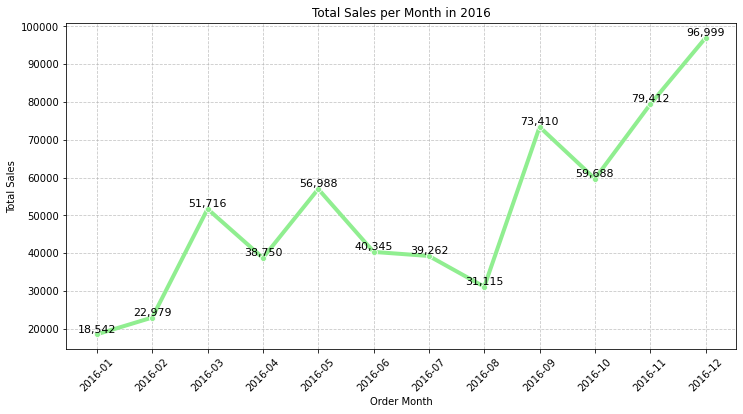

In [17]:
# Convert the order_month format to a string for easier visualization
monthly_sales["order_month"] = monthly_sales["order_month"].astype(str)

# Create line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x="order_month", y="total_sales", data=monthly_sales, marker='o', color='#90EE90', linewidth=4)

# Add data labels
for i, row in monthly_sales.iterrows():
    plt.text(row["order_month"], row["total_sales"], f'{row["total_sales"]:,.0f}', 
             color='black', ha='center', va='bottom', fontsize=11)

# Customize the appearance of the chart
plt.title('Total Sales per Month in 2016')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.grid(axis='both', linestyle='--', alpha=0.7)

## Data Analysis - Linear Regression Analysis

Linear regression helps to quantify how the month of the year affects sales, providing insights into both predictive and explanatory relationships.

### Processing the data for linear regression analysis

Koefisien (Slope): 5319.314044055943
Intercept: 16191.591880303036


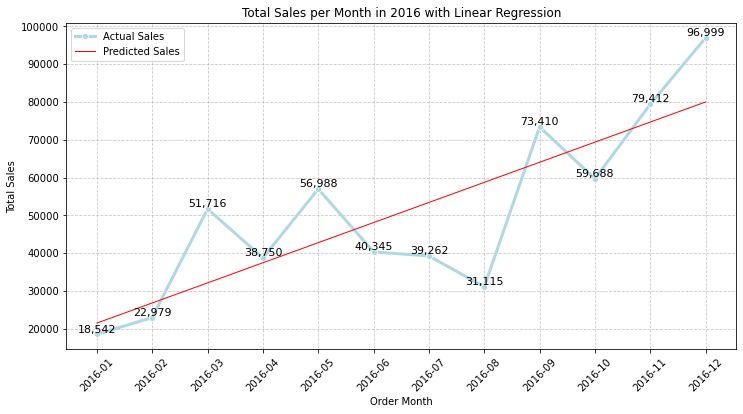

In [28]:
# Convert 'order_month' to a numerical month format (e.g., January = 1, February = 2, etc.)
monthly_sales["month_number"] = np.arange(1, len(monthly_sales) + 1)

# Create independent variable (X) and dependent variable (y)
X = monthly_sales[["month_number"]]  # Independent: the number of month
y = monthly_sales["total_sales"]  # Dependent: total sales

# Create a linear regression model
model = LinearRegression()

# Test the model
model.fit(X, y)

# Predict the values using the model
monthly_sales["predicted_sales"] = model.predict(X)

# Show coefficient (a) and intercept (b)
print(f"Koefisien (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

### Visualizing the result 

Koefisien (Slope): 5319.314044055943
Intercept: 16191.591880303036


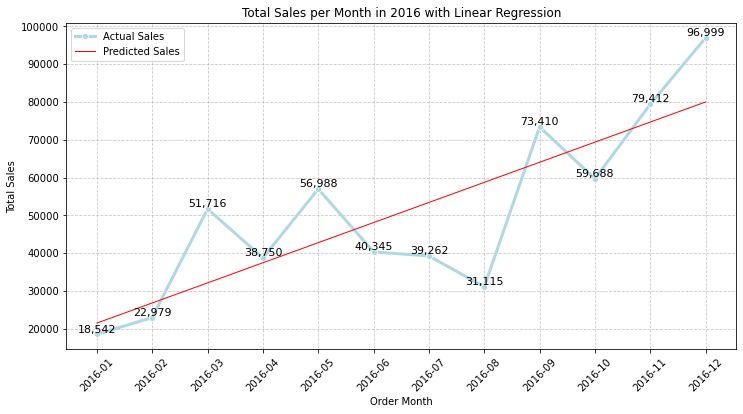

In [19]:
# Convert 'order_month' to a numerical month format (e.g., January = 1, February = 2, etc.)
monthly_sales["month_number"] = np.arange(1, len(monthly_sales) + 1)

# Create independent variable (X) and dependent variable (y)
X = monthly_sales[["month_number"]]  # Independent: the number of month
y = monthly_sales["total_sales"]  # Dependent: total sales

# Create a linear regression model
model = LinearRegression()

# Test the model
model.fit(X, y)

# Predict the values using the model
monthly_sales["predicted_sales"] = model.predict(X)

# Show coefficient (a) and intercept (b)
print(f"Koefisien (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Visualize the result
plt.figure(figsize=(12, 6))
sns.lineplot(x="order_month", y="total_sales", data=monthly_sales, marker='o', color='#ADD8E6', linewidth=3, label='Actual Sales')
sns.lineplot(x="order_month", y="predicted_sales", data=monthly_sales, color='red', linewidth=1, label='Predicted Sales')

# Add data labels
for i, row in monthly_sales.iterrows():
    plt.text(row["order_month"], row["total_sales"], f'{row["total_sales"]:,.0f}', 
             color='black', ha='center', va='bottom', fontsize=11)

# Customize the appearance of the chart
plt.title('Total Sales per Month in 2016 with Linear Regression')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()

# Show the chart
plt.show()

## Data Analysis - Correlation 

Correlation analysis helps to assess how these variables are related and whether changes in one can predict changes in another. It helps for indicating key drivers of business performance.

### Creating a table that contains information about sales and profit per month.

In [20]:
# Calculate the total sales and total profit for each order_id
order_summary = df_16.groupby("order_id").agg(
    total_sales=("sales", 'sum'),
    total_profit=("profit", 'sum')
).reset_index()

# Show the table
print(order_summary)

            order_id  total_sales  total_profit
0     CA-2016-100041      328.540      157.3777
1     CA-2016-100083       24.784        7.7450
2     CA-2016-100153       63.880       24.9132
3     CA-2016-100244      475.694      175.6262
4     CA-2016-100300     4823.090      626.4000
...              ...          ...           ...
1310  US-2016-168620      823.610        9.0030
1311  US-2016-169040     1169.454      297.4051
1312  US-2016-169369      299.070       43.0824
1313  US-2017-105830      156.512      -35.2152
1314  US-2017-165953       71.096       11.7892

[1315 rows x 3 columns]


### Visualizing the total sales and total profit 

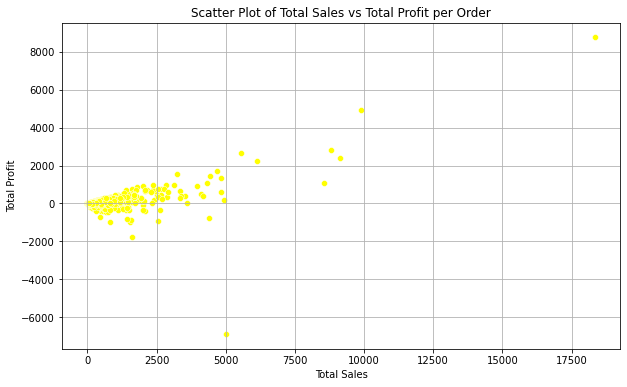

In [21]:
# Create scatterplot between total_sales and total_profit per order_id
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sales', y='total_profit', data=order_summary, color='yellow', marker='o')

# Customize the appearance of the scatterplot
plt.title('Scatter Plot of Total Sales vs Total Profit per Order')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True)

# Show the scatterplot
plt.show()

### Proving the correlation between total sales and total profit

In [22]:
# Calculate the correlation
correlation = order_summary['total_sales'].corr(order_summary['total_profit'])

# Show the value of coeffient correlation
print(f"Korelasi antara total_sales dan total_profit: {correlation}")

Korelasi antara total_sales dan total_profit: 0.6244635009401838


In [23]:
# Determine the strength of correlation
if correlation > 0.5:
    correlation_strength = "Korelasi Kuat"
elif correlation < 0.5:
    correlation_strength = "Korelasi Lemah"
else:
    correlation_strength = "Tidak ada korelasi"

# Show the result
print(f"Korelasi antara total_sales dan total_profit: {correlation}")
print(f"Interpretasi: {correlation_strength}")

Korelasi antara total_sales dan total_profit: 0.6244635009401838
Interpretasi: Korelasi Kuat


## Data Analysis - Chi Square 

chi-square analysis helps to understand whether the relationship between customer segments and product categories is due to chance or if there are meaningful patterns that could inform business strategy.

In [24]:
# Create contingent table between segment and category
contingency_table = pd.crosstab(df_16["segment"], df_16["category"])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Show the result
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table:\n{expected}")

# Conclusion of the result
if p < 0.05:
    print("Ada hubungan signifikan antara segment dan category (tolak H0).")
else:
    print("Tidak ada hubungan signifikan antara segment dan category (gagal tolak H0).")


Chi-square statistic: 5.745260890949673
P-value: 0.21899717086962367
Degrees of freedom: 4
Expected frequencies table:
[[288.4947816  803.88403556 235.62118284]
 [172.27135678 480.03015075 140.69849246]
 [101.23386162 282.08581368  82.6803247 ]]
Tidak ada hubungan signifikan antara segment dan category (gagal tolak H0).


### Visualizing

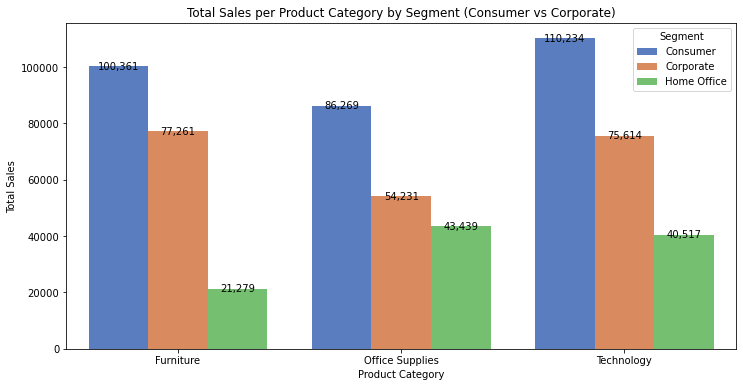

In [25]:
# BAR PLOT #

# Calculate total sales per category and segment
category_sales = df_16.groupby(['segment', 'category'])['sales'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="category", y="sales", hue="segment", data=category_sales, palette='muted')

# Add the label data
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), 
             f'{p.get_height():,.0f}', ha='center', va='center', fontsize=10, color='black')

# Customize the appearance 
plt.title('Total Sales per Product Category by Segment (Consumer vs Corporate)')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.legend(title='Segment')

# Show the bar plot
plt.show()

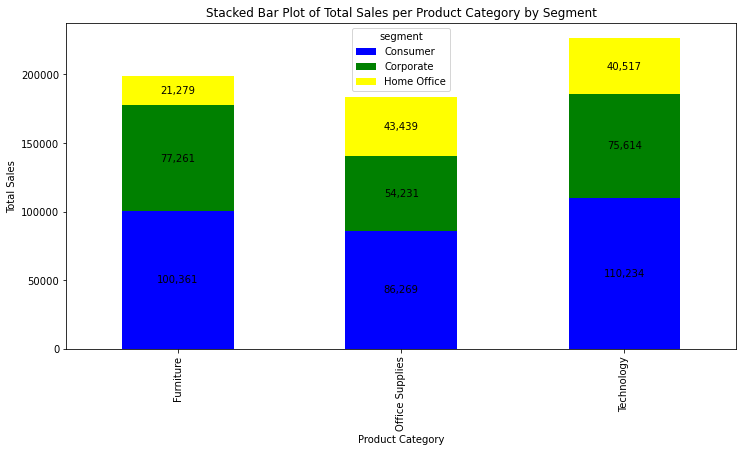

In [27]:
# STACKED BAR PLOT #

# Create pivot table ufor total sales per category and segment
pivot_sales = category_sales.pivot_table(index='category', columns='segment', values='sales', aggfunc='sum').fillna(0)

# Create stacked bar plot
ax = pivot_sales.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'green', 'yellow'])

# Add the label data
for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.text(p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2., 
                f'{height:,.0f}', ha='center', va='center', fontsize=10, color='black')

# Customize the appearance 
plt.title('Stacked Bar Plot of Total Sales per Product Category by Segment')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')

# Show the stacked bar plot
plt.show()

## Conclusion

By combining insights from all three analyses, the business can develop more effective forecasting models, sales strategies, and marketing campaigns that are data-driven. These analyses help optimize resource allocation and improve overall business performance by understanding key factors that influence sales, profits, and customer behavior.